In [5]:
import sys
sys.path.append('../')

from equadratures import *
import numpy as np

p_order = 6

x0 = Parameter(distribution = 'uniform', order = p_order, lower = 0.0, upper = 1.0)
x1 = Parameter(distribution = 'uniform', order = p_order, lower = 0.0, upper = 1.0)
params = [x0, x1]

def g(p):
    #return x[0]**2 + np.log(x[1] + 0.5)
    #return x[0]**2 + np.exp(-x[1])
    return p[0]**2 + 3.0*p[1]

In [6]:
total_sample_pts = 100000
extrema_fraction = 0.05
extreme_pts = int(extrema_fraction * total_sample_pts)

sample_pts = np.random.uniform(size = (total_sample_pts, 2))

sample_vals = np.apply_along_axis(g, 1, sample_pts)
sorted_sample_vals = np.sort(sample_vals)
sorted_pts = sample_pts[np.argsort(sample_vals)]

top_vals = sorted_sample_vals[-extreme_pts:]
top_pts = sorted_pts[-extreme_pts:]
bot_vals = sorted_sample_vals[:extreme_pts]
bot_pts = sorted_pts[:extreme_pts]

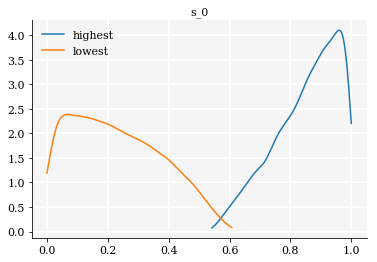

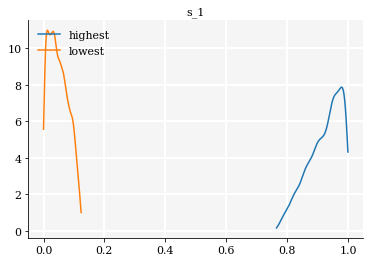

In [7]:
top_params = []
bot_params = []
names = ['s_0', 's_1']

for i in range(2):
    top_params.append(Parameter(distribution = "Custom", order = p_order, data = top_pts[:,i]))
    bot_params.append(Parameter(distribution = "Custom", order = p_order, data = bot_pts[:,i]))
    plt.figure(i)
    plt.plot(top_params[i].getPDF(1000)[0], top_params[i].getPDF(1000)[1])
    plt.plot(bot_params[i].getPDF(1000)[0], bot_params[i].getPDF(1000)[1])
    plt.title(names[i])
    plt.legend(['highest','lowest'], loc = 'upper left')

plt.show()

In [8]:
print np.var(top_pts[:,0])
print np.var(top_pts[:,1])

0.0112199737527
0.00306147536217


In [9]:
print np.var(bot_pts[:,0])
print np.var(bot_pts[:,1])

0.0218396515622
0.00102386663104


In [10]:
G = np.corrcoef(top_pts.T)
print G
H = np.corrcoef(top_pts.T)
print H

[[ 1.         -0.52948863]
 [-0.52948863  1.        ]]
[[ 1.         -0.52948863]
 [-0.52948863  1.        ]]


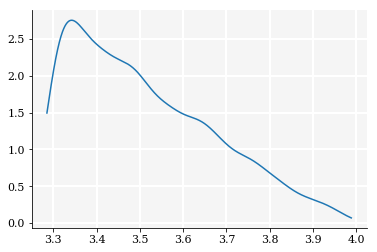

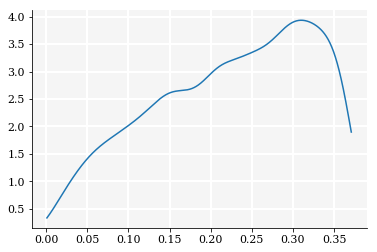

In [11]:
top_C = Parameter(distribution = "Custom", order = p_order, data = top_vals)
bot_C = Parameter(distribution = "Custom", order = p_order, data = bot_vals)

plt.figure(1)
plt.plot(top_C.getPDF(1000)[0], top_C.getPDF(1000)[1])

plt.figure(2)
plt.plot(bot_C.getPDF(1000)[0], bot_C.getPDF(1000)[1])

plt.show()

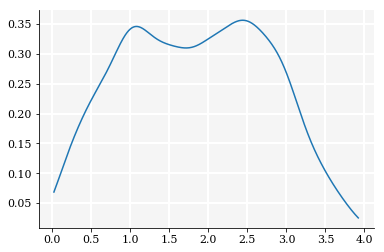

In [12]:
output = Parameter(distribution = "Custom", order = p_order, data = sample_vals[:3000])
plt.plot(output.getPDF(1000)[0], output.getPDF(1000)[1])
plt.show()

In [13]:
p_order = 6
orders = [p_order,p_order]
polybasis = Basis("Total order", orders)

dummy_x = np.random.uniform(size = (10000,2))

poly = Polyreg(params, polybasis, dummy_x, fun=g,quadrature_rule = 'tensor grid')
overall_stats = poly.getStatistics()

fo_skew = overall_stats.getCondSkewness(1)

print fo_skew
print overall_stats.skewness

{(0,): 0.99999999999999856, (1,): 9.1032342576850901e-14}
0.0220359364313


In [14]:
import scipy.stats
print stats.skew(sample_vals)

0.0216956010746


In [15]:
dummy_x

array([[ 0.41406855,  0.54184232],
       [ 0.10225223,  0.29460049],
       [ 0.28507528,  0.86698839],
       ..., 
       [ 0.9954093 ,  0.72093955],
       [ 0.95620635,  0.35071025],
       [ 0.8932919 ,  0.66176361]])

In [16]:
g(dummy_x[0,:])

1.7969797170866693

In [17]:
overall_stats.getCondSkewness(1)


{(0,): 0.99999999999999856, (1,): 9.1032342576850901e-14}

In [18]:
poly.basis.elements


array([[ 0.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 0.,  2.],
       [ 2.,  0.],
       [ 1.,  2.],
       [ 2.,  1.],
       [ 2.,  2.],
       [ 0.,  3.],
       [ 3.,  0.],
       [ 3.,  1.],
       [ 1.,  3.],
       [ 2.,  3.],
       [ 3.,  2.],
       [ 3.,  3.],
       [ 0.,  4.],
       [ 4.,  0.],
       [ 1.,  4.],
       [ 4.,  1.],
       [ 2.,  4.],
       [ 4.,  2.],
       [ 0.,  5.],
       [ 5.,  0.],
       [ 5.,  1.],
       [ 1.,  5.],
       [ 0.,  6.],
       [ 6.,  0.]])